# TAREA

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

In [2]:
import numpy as np
import pandas as pd

n = np.logspace(1,5,5)

In [3]:
def f1(x):
    return np.exp(x)*np.log(x)
def f2(x):
    return np.sin(x)*np.log(x)

In [4]:
def montecarlo(f,n,a,b):
    u = np.random.uniform(a,b,n)
    return np.mean(f(u))*(b-a)

In [5]:
tabla1 = pd.DataFrame(columns = ['Función 1','Función 2'], index = n)

for i in n:
    tabla1.loc[i,'Función 1'] = montecarlo(f1,int(i),1,3)
    
for i in n:
    tabla1.loc[i,'Función 2'] = montecarlo(f2,int(i),1,3)
    
tabla1

,Función 1,Función 2
10.0,11.944799,0.757702
100.0,11.923271,0.873286
1000.0,14.304561,0.882234
10000.0,14.048578,0.876591
100000.0,13.987713,0.87034


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

In [13]:
def montecarlo2(region,ax,bx,ay,by,N):
    x = np.random.uniform(ax,bx,N)
    y = np.random.uniform(ay,by,N)
    B = region(x,y)
    AR = (bx-ax)*(by-ay)
    return np.mean(B)*AR

def bernoulli(x,y):
    return ((x**2+2*y**2) <= (-2*x+8*y-7))

In [14]:
tabla2 = pd.DataFrame(columns = ['Aproximación','Error relativo'], index = n)

### Buscando el área de referencia

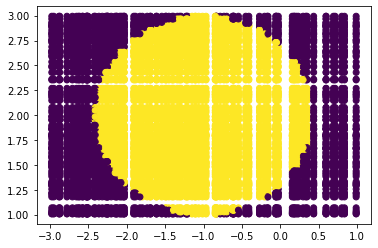

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
x = np.random.uniform(-3,1,100)
y = np.random.uniform(1,3,100)
X,Y = np.meshgrid(x,y)

plt.figure()
plt.scatter(X,Y, c= bernoulli(X,Y))

In [16]:
for i in n:
    tabla2.loc[i,'Aproximación']= montecarlo2(bernoulli,-3,1,1,3,int(i))
    
tabla2

,Aproximación,Error relativo
10.0,4.8,NaN
100.0,5.12,NaN
1000.0,4.528,NaN
10000.0,4.4184,NaN
100000.0,4.43944,NaN


In [17]:
ax = -3
bx = 1
ay = 1
by = 3

AR = (bx-ax)*(by-ay)
for i in n:
    AD = tabla2["Aproximación"][i]
    c_rel= np.sqrt((1-(AD/AR))/(AD/AR))
    tabla2["Error relativo"][i] = c_rel 
    
tabla2
    

,Aproximación,Error relativo
10.0,4.8,0.816497
100.0,5.12,0.75
1000.0,4.528,0.875662
10000.0,4.4184,0.900339
100000.0,4.43944,0.895561


3. Describe 3 casos de uso de integración Montecarlo en tu ingeniería.

## Integración Montecarlo en las finanzas

## Caso 1 <br>
**Valorar proyectos empresariales y de inversión** <br>
Los métodos de Monte Carlo son utilizados por analistas financieros que desean construir "estocástico " o probabilístico modelos financieros en contraposición a los tradicionales estáticos y determinista modelos. Aquí, con el fin de analizar las características de un proyecto valor presente neto (VAN), los componentes del flujo de efectivo que son (en gran medida) impactado por incertidumbre están modelados, incorporando cualquier correlación entre estos, reflejando matemáticamente sus "características aleatorias". Luego, estos resultados se combinan en un histograma de VPN (es decir, el Distribución de probabilidad ), y el VAN promedio de la inversión potencial, así como su volatilidad y otras sensibilidades. Esta distribución permite, por ejemplo, estimar la probabilidad de que el proyecto tenga un valor presente neto mayor que cero <br>

## Caso 2
**Valuación de opciones por Monte-Carlo** <br>
Al valorar un opción sobre equidad, la simulación genera varios miles de rutas de precios posibles (pero aleatorias) para la acción subyacente, con el ejercicio valor (es decir, "pago") de la opción para cada ruta. Luego, estos pagos se promedian y descontado hasta hoy, y este resultado es el valor de la opción hoy. <br>

## Caso 3
**Activos financieros** <br>
Ya que su comportamiento futuro tiene relación con su desempeño pasado y un factor aleatorio. Este elemento aleatorio es lo que se simula en el método Montercarlo. Por lo tanto, al simular el precio futuro con elementos de su comportamiento pasado y la influencia de factores aleatorios que lo rodean, podemos tener una idea del comportamiento que podría tener el activo financiero. Esto nos permite tomar precauciones si los activos simulados influyen en el desempeño de la empresa. 